In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [15, 15] #figure size
plt.rcParams.update({'font.size': 22}) # caption siz

In [2]:
def gaussian(x, mean, variance):
    return np.exp(-np.square(x-mean)/(2.0*np.square(variance)))

def absolute_residual_error(predicted, expected):
    return np.mean(np.absolute(predicted - expected))

In [3]:
class rbf_network:
    def __init__(self):
        self.weights = None

    def fit(self, patterns, targets, centers, variance, epochs=100, learning_rate=0.01, learning_rule="least_squares"):

        if learning_rule == "least_squares":
#             self.init_weights(len(centers), 1, len(patterns))
            phi = np.array([gaussian(x, centers, variance) for x in patterns])
            self.weights = np.linalg.inv(phi.T @ phi) @ phi.T @ targets

        elif learning_rule == "delta":
            # output is one dimension data, len(patterns) means the size of input samples
            self.init_weights(len(centers), 1, len(patterns))
            for _i in range(epochs):
                #reshuffle indexes between each epoch
                shuffled_idxs = np.random.permutation(len(patterns))
                for idx in shuffled_idxs:
                    curr_pattern, curr_target = patterns[idx], targets[idx]
                    phi = gaussian(curr_pattern, centers, variance)
                    phi = np.reshape(phi, (len(phi),1))
                    
                    delta_w = (curr_target - phi.T @ self.weights) * phi
                    self.weights += learning_rate * delta_w


    def predict(self, patterns):
        phi = np.array([gaussian(x, centers, variance) for x in patterns])
        return phi @ self.weights

    def init_weights(self, pattern_dim, target_dim, pattern_count):
        # here the pattern_dims means the size of units/ centers/centroids
        self.weights = np.random.normal(loc=0.0, scale=1.0/pattern_count, size=(pattern_dim, target_dim))

# Estimating sin(2x)

In [4]:
train_inputs = np.arange(0, 2*np.pi, 0.1)
train_outputs = np.sin(2*train_inputs)
train_outputs += np.random.normal(0, 0.1, train_outputs.shape)
train_outputs = np.reshape(train_outputs, (len(train_outputs), 1))

test_inputs = np.arange(0.05, 2*np.pi, 0.1)
test_outputs = np.sin(2*test_inputs)
test_outputs += np.random.normal(0, 0.1, test_outputs.shape)

In [5]:
rbf_nn = rbf_network()

## Comparing number of units and their width

Here we only have 2 centroids, where the sine function is 0. The width is pi/8


In [57]:
centers = np.arange(np.pi/4.0, 2.0*np.pi, np.pi)
variance = np.pi/8.0

rbf_nn = rbf_network()
rbf_nn.fit(train_inputs, train_outputs, centers, variance, learning_rule="delta")
results1 = rbf_nn.predict(test_inputs)
results1 = results1[:, 0]
absolute_residual_error(results1, test_outputs)

0.3790705225665811

Same, but the width is increased to pi/4

In [58]:
centers = np.arange(np.pi/4.0, 2.0*np.pi, np.pi)
variance = np.pi/4.0

rbf_nn = rbf_network()
rbf_nn.fit(train_inputs, train_outputs, centers, variance, learning_rule="delta")
results2 = rbf_nn.predict(test_inputs)
results2 = results2[:, 0]
absolute_residual_error(results2, test_outputs)

0.5459617830628029

Same, but the width is increased to pi/2

In [14]:
centers = np.arange(np.pi/4.0, 2.0*np.pi, np.pi)
variance = np.pi/2.0

rbf_nn = rbf_network()
rbf_nn.fit(train_inputs, train_outputs, centers, variance, learning_rule="delta")
results_m = rbf_nn.predict(test_inputs)
results_m = results_m[:, 0]
absolute_residual_error(results_m, test_outputs)

0.6183282658923013

In order to see the trend more clearly, we make a for functions and draw the figure.

Variance:  [0.3141592653589793, 0.3490658503988659, 0.39269908169872414, 0.4487989505128276, 0.5235987755982988, 0.6283185307179586, 0.7853981633974483, 1.0471975511965976, 1.5707963267948966, 3.141592653589793]
ARES:      [0.4017968284382232, 0.3872522821320743, 0.37906056862409304, 0.3928158502681087, 0.42794072663467897, 0.4802868475532176, 0.5457485431128919, 0.605120512129032, 0.6182742730454364, 0.591636836633482]


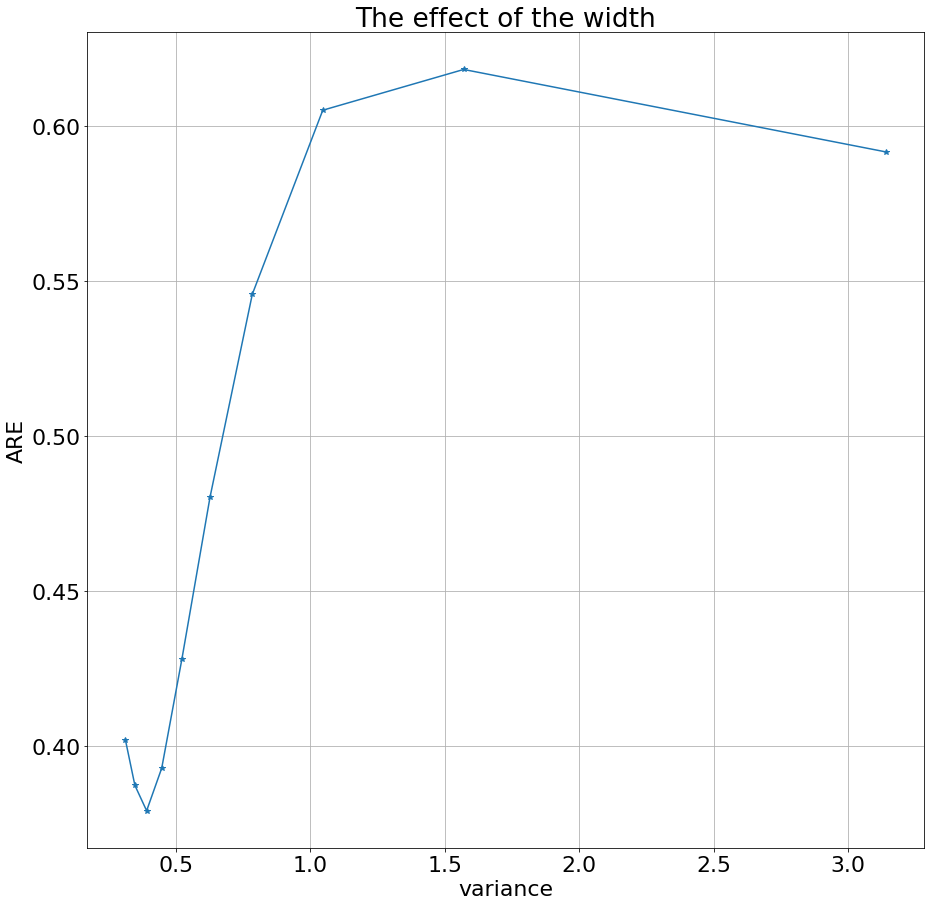

In [76]:
centers = np.arange(np.pi/4.0, 2.0*np.pi, np.pi)
rbf_nn = rbf_network()
variance_list = []
ARE_list = []
for i in range(10,0,-1):
    variance = np.pi/i
#     print("variance ",variance)
    variance_list.append(variance)
    rbf_nn.fit(train_inputs, train_outputs, centers, variance, learning_rule="delta")
    results_m = rbf_nn.predict(test_inputs)
    results_m = results_m[:, 0]
    ARE_list.append(absolute_residual_error(results_m, test_outputs))
print("Variance: ",variance_list )
print("ARES:     ",ARE_list)
ARE_list_delta = ARE_list

plt.title("The effect of the width")

plt.plot(variance_list, ARE_list,marker = '*')
plt.xlabel("variance")
plt.ylabel("ARE")
plt.grid()
plt.show()

Here we have 4 centroids at the extremal points of the sine function in the interval.

Variance:  [0.3141592653589793, 0.3490658503988659, 0.39269908169872414, 0.4487989505128276, 0.5235987755982988, 0.6283185307179586, 0.7853981633974483, 1.0471975511965976, 1.5707963267948966, 3.141592653589793]
ARES:      [0.1574486081197537, 0.12683111982895526, 0.10375590143184613, 0.09698534764941884, 0.10232515168288808, 0.12050793123102033, 0.16432654645774314, 0.27705586012559713, 0.5361770784355332, 0.5909638105300257]


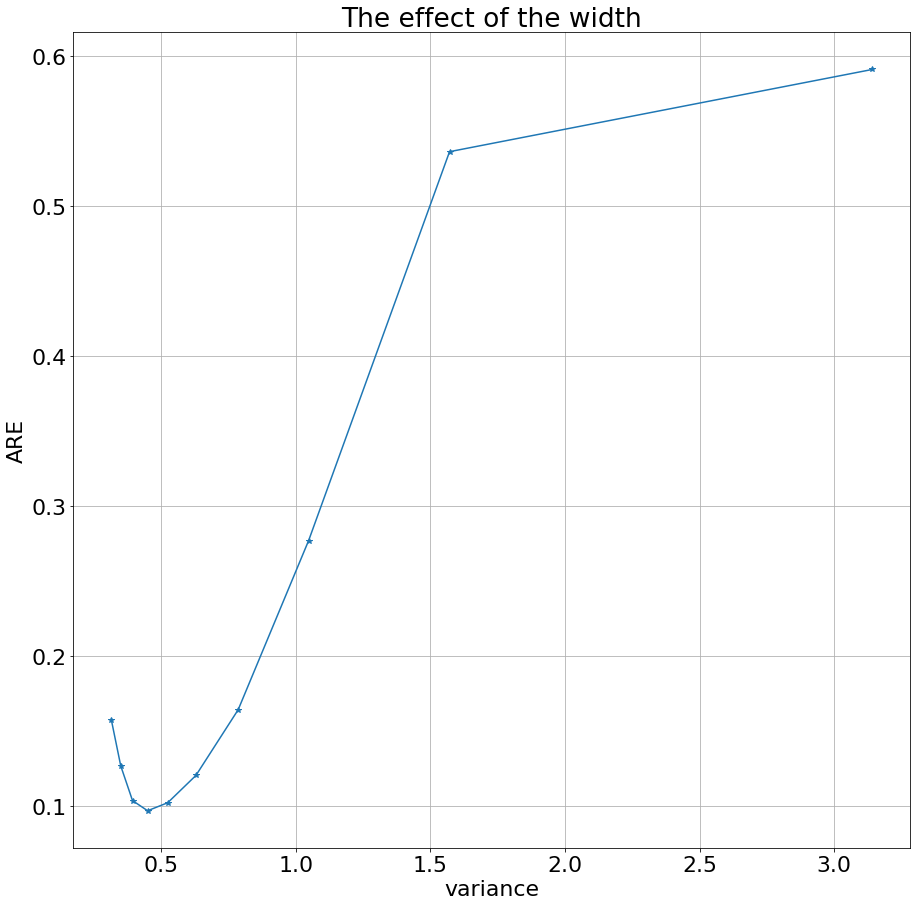

In [72]:
centers = np.arange(np.pi/4.0, 2*np.pi, np.pi/2.0)
variance_list_1 = []
ARE_list_1 = []
for i in range(10,0,-1):
    variance = np.pi/i
#     print("variance ",variance)
    variance_list_1.append(variance)
    rbf_nn.fit(train_inputs, train_outputs, centers, variance, learning_rule="delta")
    results_m = rbf_nn.predict(test_inputs)
    results_m = results_m[:, 0]
    ARE_list_1.append(absolute_residual_error(results_m, test_outputs))
print("Variance: ",variance_list_1 )
print("ARES:     ",ARE_list_1)

plt.title("The effect of the width")

plt.plot(variance_list_1, ARE_list_1,marker = '*')
plt.xlabel("variance")
plt.ylabel("ARE")
plt.grid()
plt.show()


Here we have 6 centroids at the extremal points of the sine function in the interval.

In [55]:
centers = np.arange(-np.pi/4.0, 2.5*np.pi, np.pi/2.0)
variance = np.pi/8.0
print(centers)
rbf_nn.fit(train_inputs, train_outputs, centers, variance, learning_rule="delta")
results3 = rbf_nn.predict(test_inputs)
results3 = results3[:, 0]
absolute_residual_error(results3, test_outputs)

[-0.78539816  0.78539816  2.35619449  3.92699082  5.49778714  7.06858347]


0.1038175647484498

Same, but the width is increased to pi/4

In [56]:
centers = np.arange(-np.pi/4.0, 2.5*np.pi, np.pi/2.0)
variance = np.pi/4.0

rbf_nn.fit(train_inputs, train_outputs, centers, variance, learning_rule="delta")
results4 = rbf_nn.predict(test_inputs)
results4 = results4[:, 0]
absolute_residual_error(results4, test_outputs)

0.14336342121230658

Same, but the width is increased to pi/2

In [38]:
centers = np.arange(-np.pi/4.0, 2.5*np.pi, np.pi/2.0)
variance = np.pi/2.0

rbf_nn.fit(train_inputs, train_outputs, centers, variance, learning_rule="delta")
results4 = rbf_nn.predict(test_inputs)
results4 = results4[:, 0]
absolute_residual_error(results4, test_outputs)

0.49871024996752883

In [50]:
centers = np.arange(-np.pi/4.0, 2.5*np.pi, np.pi/2.0)
variance_list_2 = []
ARE_list_2 = []
for i in range(10,0,-1):
    variance = np.pi/i
#     print("variance ",variance)
    variance_list_2.append(variance)
    rbf_nn.fit(train_inputs, train_outputs, centers, variance, learning_rule="delta")
    results_m = rbf_nn.predict(test_inputs)
    results_m = results_m[:, 0]
    ARE_list_2.append(absolute_residual_error(results_m, test_outputs))
print("Variance: ",variance_list_2 )
print("ARES:     ",ARE_list_2)

Variance:  [0.3141592653589793, 0.3490658503988659, 0.39269908169872414, 0.4487989505128276, 0.5235987755982988, 0.6283185307179586, 0.7853981633974483, 1.0471975511965976, 1.5707963267948966, 3.141592653589793]
ARES:      [0.1574808200915099, 0.12683896422114876, 0.1037298000518463, 0.0967011300202793, 0.10087341360697163, 0.11129187417249552, 0.14342081444225369, 0.28490384295409005, 0.49857551280581863, 0.5865006060682594]


Draw these three lines together

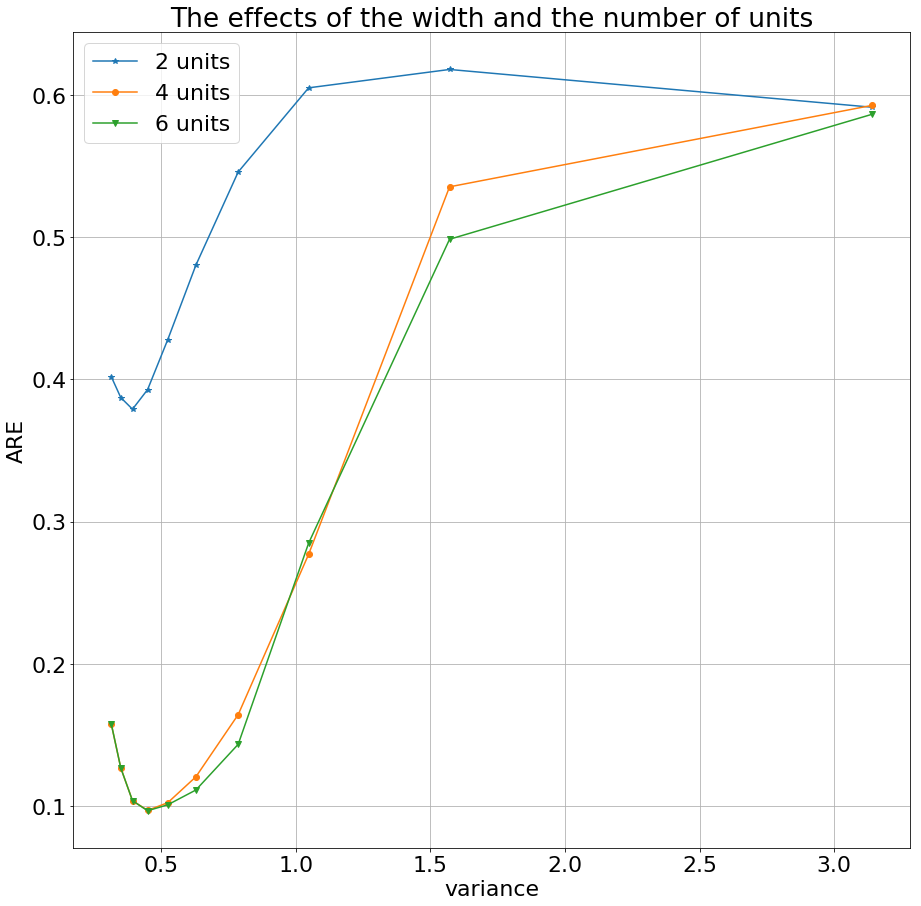

In [52]:
plt.title("The effects of the width and the number of units")

plt.plot(variance_list, ARE_list,marker = '*', label = '2 units')
plt.plot(variance_list_1, ARE_list_1,marker = 'o', label = '4 units')
plt.plot(variance_list_2, ARE_list_2,marker = 'v', label = '6 units')
plt.legend()
plt.xlabel("variance")
plt.ylabel("ARE")
plt.grid()
plt.show()

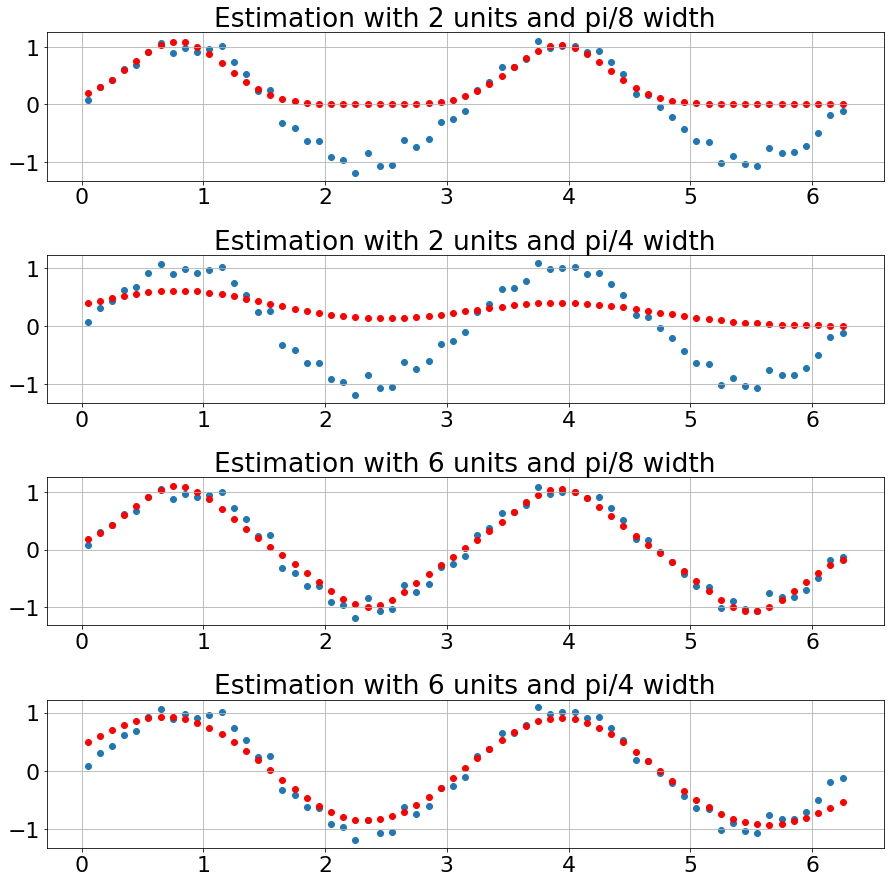

In [59]:
plt.rcParams['figure.figsize'] = [15, 15] #figure size
fig, axs = plt.subplots(4)
axs[0].set_title("Estimation with 2 units and pi/8 width")
axs[0].scatter(test_inputs, test_outputs)
axs[0].scatter(test_inputs, results1, c='r')
axs[0].grid()

axs[1].set_title("Estimation with 2 units and pi/4 width")
axs[1].scatter(test_inputs, test_outputs)
axs[1].scatter(test_inputs, results2, c='r')
axs[1].grid()

axs[2].set_title("Estimation with 6 units and pi/8 width")
axs[2].scatter(test_inputs, test_outputs)
axs[2].scatter(test_inputs, results3, c='r')
axs[2].grid()

axs[3].set_title("Estimation with 6 units and pi/4 width")
axs[3].scatter(test_inputs, test_outputs)
axs[3].scatter(test_inputs, results4, c='r')
axs[3].grid()

plt.subplots_adjust(hspace = 0.5)
plt.show()

As for the width parameter, when it is to small, it can be local to the current point(as can be seen on the last plot above), or when it is to big, it does not have enough effect in does not have a big enough effect on the points nearby. The number of units need to be chosen accoording to the complexity of the problem. The number of local minimas and maximas is sufficient for the sine function for example.

The learning rate is not used in the least squares algorithm. In case of the delta rule, if the learning rate is too large, then the outputs will be too big. If the learning rate is too small, the ouputs stay close to zero.

Reproducing the same results as the least square estimate on the original data is a matter of finding the right parameters for learning rate and number of epochs, since the least square estimate has the advantage of finding the exact solution. But with the right parameters, it is possible.

# Now we test the LSE with the noisy data

[[[ 7.80042435e-02  1.56212422e-01  2.82689496e-01 ...  1.39264737e-10
    1.54044754e-11  1.53974723e-12]
  [ 7.81388170e-02  1.56481921e-01  2.83177194e-01 ... -2.51673669e-01
   -1.36723972e-01 -6.71194397e-02]
  [ 7.32986653e-02  1.54527868e-01  2.82492539e-01 ... -3.15315422e-01
   -3.11399545e-01 -4.90660681e-01]]

 [[ 1.25855195e-01  2.20884371e-01  3.57121678e-01 ...  1.01842705e-08
    1.71164062e-09  2.65004120e-10]
  [ 1.26569329e-01  2.22137724e-01  3.59148066e-01 ... -3.24337463e-01
   -1.97857585e-01 -1.11189984e-01]
  [ 8.59476436e-02  2.02860501e-01  3.51150699e-01 ... -3.80419919e-01
   -3.27490473e-01 -3.78677849e-01]]

 [[ 1.89414433e-01  2.95416918e-01  4.31812879e-01 ...  4.63159629e-07
    1.13179137e-07  2.59202980e-08]
  [ 1.92574718e-01  3.00345713e-01  4.39016971e-01 ... -4.02903773e-01
   -2.72650358e-01 -1.72921316e-01]
  [ 9.01195287e-02  2.44457989e-01  4.12169218e-01 ... -4.29873958e-01
   -3.26362206e-01 -2.69268170e-01]]

 ...

 [[ 3.26027466e-01  3.470

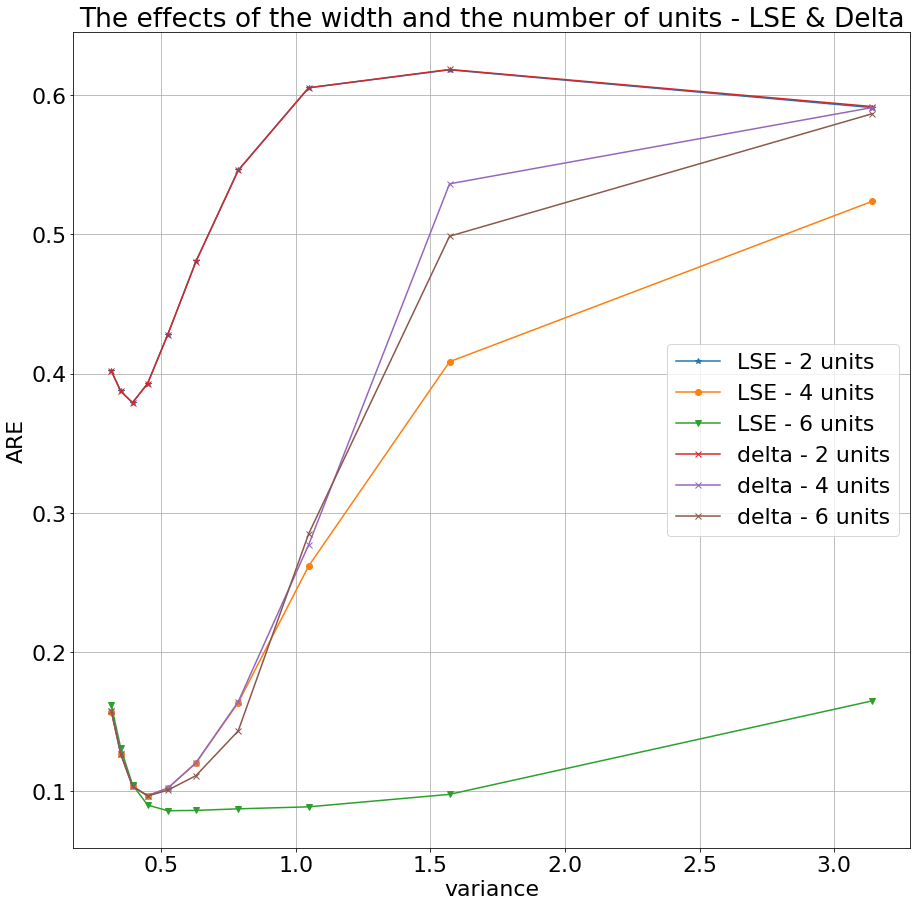

In [79]:
centers_1 = np.arange(np.pi/4.0, 2.0*np.pi, np.pi)
centers_2 = np.arange(np.pi/4.0, 2.0*np.pi, np.pi/2)
centers_3 = np.arange(-np.pi/4.0, 2.5*np.pi, np.pi/2)
centers_list = np.array([centers_1, centers_2, centers_3])

results_list =  [[ ] for k in range(10)]
variance_list = []
ARE_list = []

rbf_nn = rbf_network()

for j in range(10,0,-1):
    variance = np.pi/j
    variance_list.append(variance)
    for i in range(3):
        centers = centers_list[i]
#         print('Centers:  ',centers)
#         print('variance  ',variance)
        rbf_nn.fit(train_inputs, train_outputs, centers, variance, learning_rule="least_squares")
        results = rbf_nn.predict(test_inputs)
        results = results[:, 0]
        results_list[10-j].append(results)
        ARE_list.append(absolute_residual_error(results, test_outputs)) 

results_list = np.array(results_list)
# results_list = results_list.T
print(results_list)

ARE_list = np.array(ARE_list)
ARE_list = ARE_list.reshape(10,3)
ARE_list = ARE_list.T
print(ARE_list)

plt.title("The effects of the width and the number of units - LSE & Delta")

plt.plot(variance_list, ARE_list[0],marker = '*', label = 'LSE - 2 units')
plt.plot(variance_list, ARE_list[1],marker = 'o', label = 'LSE - 4 units')
plt.plot(variance_list, ARE_list[2],marker = 'v', label = 'LSE - 6 units')
plt.plot(variance_list, ARE_list_delta,marker = 'x', label = 'delta - 2 units')
plt.plot(variance_list, ARE_list_1,marker = 'x', label = 'delta - 4 units')
plt.plot(variance_list, ARE_list_2,marker = 'x', label = 'delta - 6 units')

plt.legend()
plt.xlabel("variance")
plt.ylabel("ARE")
plt.grid()
plt.show()
    




From these figures we can see that in general LSE has better performance than Delta rule.Because LSE can see the whole dataset and compute the exact solution. One interesting thing here is when we choose two centroids the results of LSE are almost the same as Delta rule's results.(Question: why?)

Another trend is that as the widthes of gaussian functions increase, the ARE increase accordingly, But all curves are not strictly increasig. They all have the minimums. Our explanation is that when the widthes are too narrow, the system is overfitted. As the width gradually increase, the algorithm finds the best weightes. If the widthes keep increasing, the influence on the points nearby decrease so the ARE increase.   

## Randomly positioning nodes

In [84]:
centers = np.random.uniform(-np.pi/4, 2.5*np.pi, size=6)
variance = np.pi/8.0

rbf_nn = rbf_network()
rbf_nn.fit(train_inputs, train_outputs, centers, variance, learning_rule="delta")
results_rand = rbf_nn.predict(test_inputs)
results_rand = results_rand[:, 0]
absolute_residual_error(results_rand, test_outputs)

0.41415661734650416

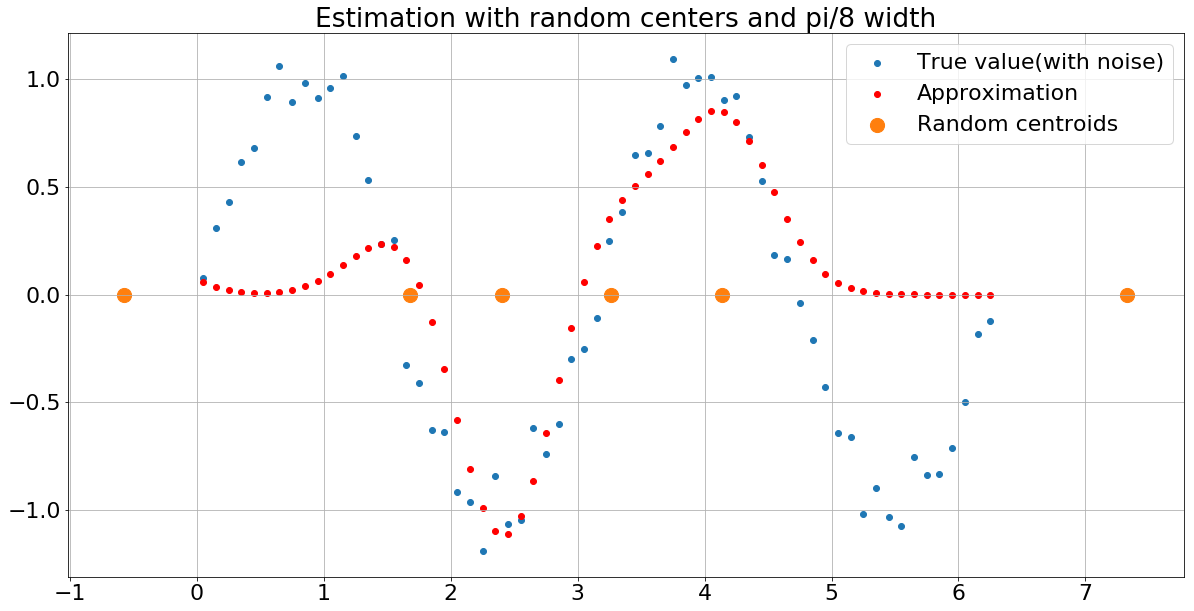

In [85]:
plt.rcParams['figure.figsize'] = [20, 10] #figure size
plt.title("Estimation with random centers and pi/8 width")
plt.scatter(test_inputs, test_outputs, label="True value(with noise)")
plt.scatter(test_inputs, results_rand, c='r', label="Approximation")
plt.scatter(centers, np.zeros(len(centers)), s=200, label="Random centroids")
plt.legend()
plt.grid()
plt.show()

Randomly positioning the centroids has a negative effect on the performance: the error increased from 0.104 to 0.414. RBF networks are sensitive for the choise of centroids, so they have to be chosen either by hand, or preferably a learning algorithm. Generally, the best choice for the centroids are the extremal points.

# Test the effect of eta

In [129]:
class rbf_network_1:
    def __init__(self):
        self.weights = None
#         self.centers = None
#         self.variance = None

    def fit(self, patterns, targets, centers, variance, epochs=100, learning_rate=0.01, learning_rule="least_squares"):
        
#         self.centers = centers
#         self.variance = variance
        if learning_rule == "least_squares":
            phi = np.array([gaussian(x, centers, variance) for x in patterns])
            self.weights = np.linalg.inv(phi.T @ phi) @ phi.T @ targets

        elif learning_rule == "delta":
            # output is one dimension data, len(patterns) means the size of input samples
            self.init_weights(len(centers), 1, len(patterns))
            ARE_l = []
            test_targets = targets.flatten()
            for _i in range(epochs):
                #reshuffle indexes between each epoch
                shuffled_idxs = np.random.permutation(len(patterns))
                for idx in shuffled_idxs:
                    curr_pattern, curr_target = patterns[idx], targets[idx]
                    phi = gaussian(curr_pattern, centers, variance)
                    phi = np.reshape(phi, (len(phi),1))
                    
                    delta_w = (curr_target - phi.T @ self.weights) * phi
                    self.weights += learning_rate * delta_w
                phi_ = np.array([gaussian(x, centers, variance) for x in patterns])
                results_ = phi_ @ self.weights
                results_ = results_[:,0]
                ARE_l.append(absolute_residual_error(results_, test_targets))
            return ARE_l


    def predict(self, patterns):
        phi = np.array([gaussian(x, centers, variance) for x in patterns])
        return phi @ self.weights

    def init_weights(self, pattern_dim, target_dim, pattern_count):
        # here the pattern_dims means the size of units/ centers/centroids
        self.weights = np.random.normal(loc=0.0, scale=1.0/pattern_count, size=(pattern_dim, target_dim))

test in test data:  0.39619578566148667
test in trainning data:  0.383268998954599


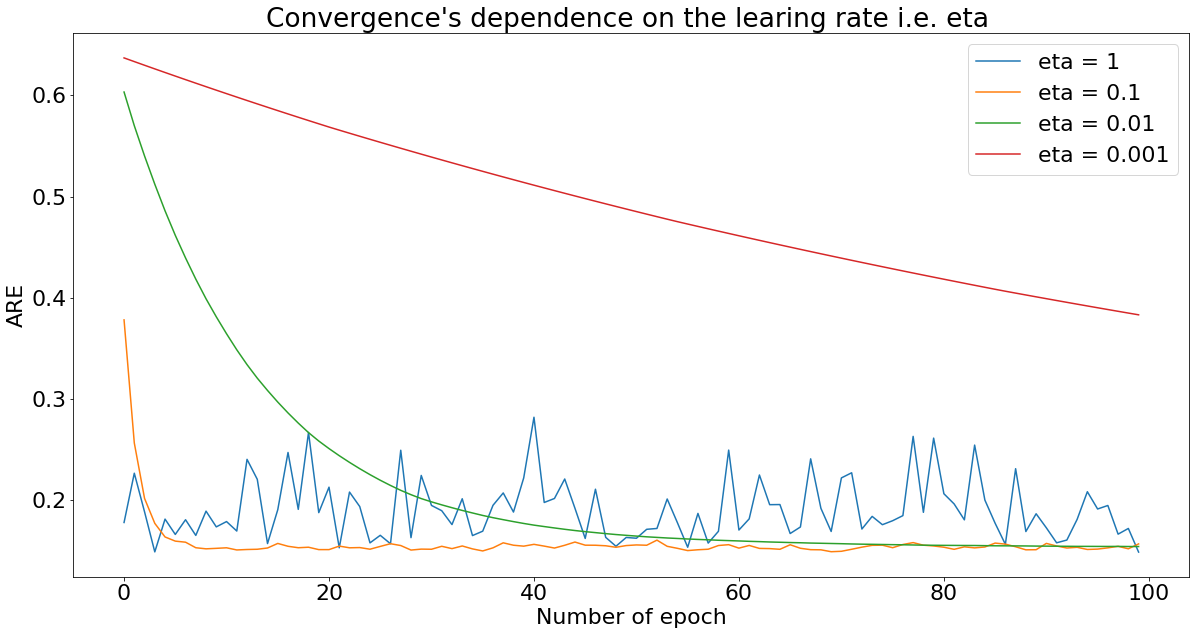

In [140]:
train_inputs = np.arange(0, 2*np.pi, 0.1)
train_outputs = np.sin(2*train_inputs)
train_outputs += np.random.normal(0, 0.1, train_outputs.shape)
train_outputs = np.reshape(train_outputs, (len(train_outputs), 1))

test_inputs = np.arange(0.05, 2*np.pi, 0.1)
test_outputs = np.sin(2*test_inputs)
test_outputs += np.random.normal(0, 0.1, test_outputs.shape)

centers = np.arange(np.pi/4, 2.0*np.pi, np.pi/2.0)
variance = np.pi/4.0

rbf_nn = rbf_network_1()
ARE_l_0 = rbf_nn.fit(train_inputs, train_outputs, centers,  variance,epochs=100,learning_rate=1, learning_rule="delta")
ARE_l_1 = rbf_nn.fit(train_inputs, train_outputs, centers,  variance,epochs=100,learning_rate=0.1, learning_rule="delta")
ARE_l_2 = rbf_nn.fit(train_inputs, train_outputs, centers,  variance,epochs=100,learning_rate=0.01, learning_rule="delta")
ARE_l_3 = rbf_nn.fit(train_inputs, train_outputs, centers,  variance,epochs=100,learning_rate=0.001, learning_rule="delta")

results = rbf_nn.predict(test_inputs)
results = results[:, 0]
print("test in test data: ",absolute_residual_error(results, test_outputs))

results = rbf_nn.predict(train_inputs)
results = results[:, 0]
print("test in trainning data: ",absolute_residual_error(results, train_outputs.flatten()))

plt.title("Convergence's dependence on the learing rate i.e. eta ")
plt.xlabel("Number of epoch")
plt.ylabel("ARE")
plt.plot(range(len(ARE_l_0)),ARE_l_0,label = 'eta = 1')
plt.plot(range(len(ARE_l_1)),ARE_l_1,label = 'eta = 0.1')
plt.plot(range(len(ARE_l_2)),ARE_l_2,label = 'eta = 0.01')
plt.plot(range(len(ARE_l_3)),ARE_l_3,label = 'eta = 0.001')
plt.legend()
plt.show()

When 
eta = 1 (blue line):    the learning rate is too large, which causes the RBF network imporssible to achieve convergence no matter how many epoches it takes because it takes so large step that it skips all the local minimum
eta = 0.1 (yellow line): it can achieve convergence in 100 epoches, precisely, less than 10 epoches
eta = 0.01 (green line): it can achieve convergence in 100 epoches, precisely, less than 60 epoches
eta = 0.001 (red line):  it cannot achieve convergence in 100 epoches, but it can achieve convergences eventually

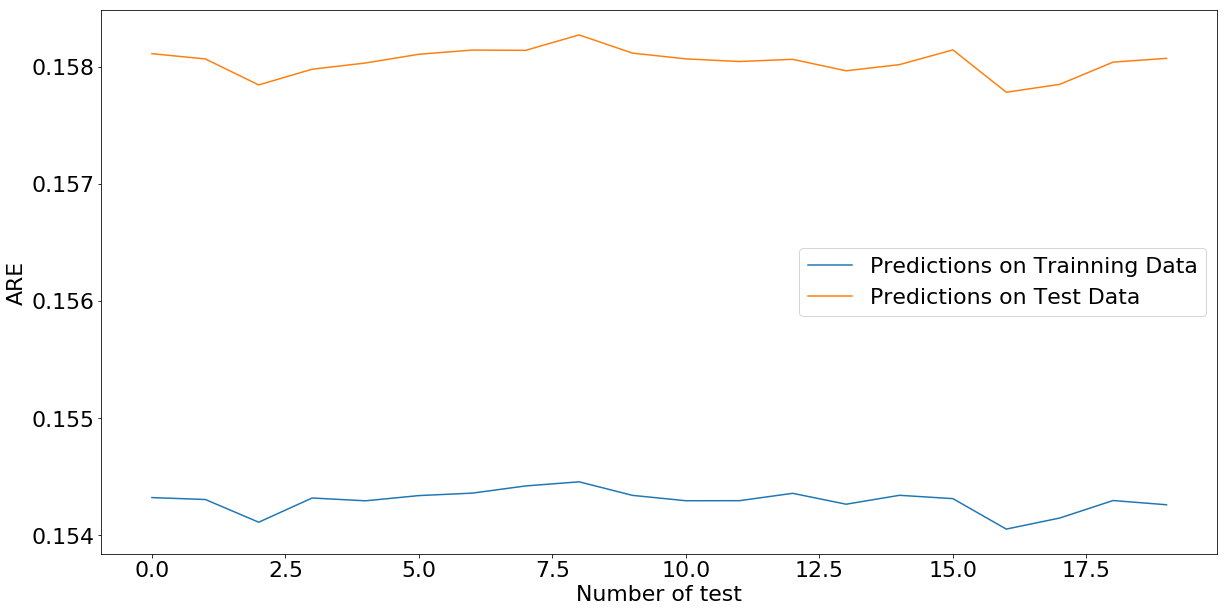

In [151]:

centers = np.arange(np.pi/4, 2.0*np.pi, np.pi/2.0)
variance = np.pi/4.0
rbf_nn = rbf_network_1()
predictions_on_trainingData = []
predictions_on_testData     = []
train_outputs_flatten = train_outputs.flatten() 

for i in range(20):
    ARE_l = rbf_nn.fit(train_inputs, train_outputs, centers,  variance,epochs=100,learning_rate=0.01, learning_rule="delta")
    
    results = rbf_nn.predict(test_inputs)
    results = results[:, 0]
    predictions_on_testData.append(absolute_residual_error(results, test_outputs))

    results = rbf_nn.predict(train_inputs)
    results = results[:, 0]
    predictions_on_trainingData.append(absolute_residual_error(results, train_outputs_flatten))

# plt.title("Convergence's dependence on the learing rate i.e. eta ")
plt.xlabel("Number of test")
plt.ylabel("ARE")
plt.plot(range(20),predictions_on_trainingData,label = 'Predictions on Trainning Data')
plt.plot(range(20),predictions_on_testData,label = 'Predictions on Test Data')

plt.legend()
plt.show()